In [22]:
#using Pkg
#Pkg.add("ImageView")
using Images, FileIO, Colors

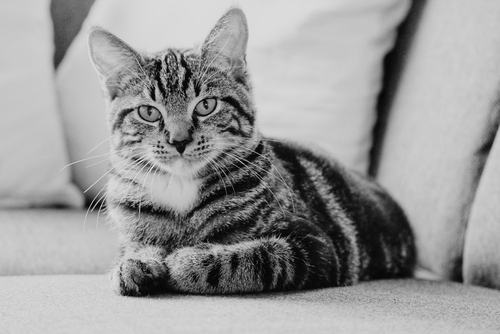

In [23]:
cat_one = load("cat_one_resize.jpg")
cat_oneg = Gray.(cat_one)

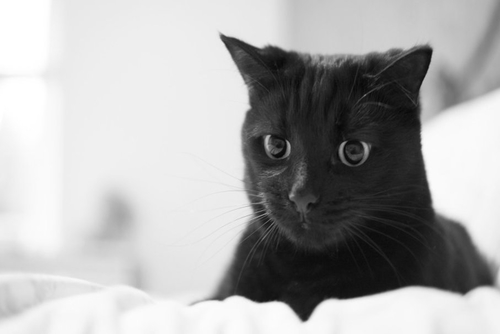

In [24]:
cat_two = load("cat_two_resize.jpg")
cat_twog = Gray.(cat_two)

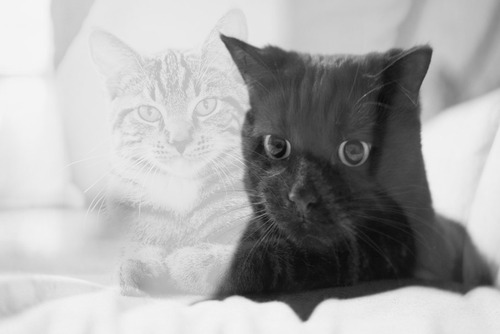

In [25]:
using LinearAlgebra
#convert image to array
mat_one = convert(Array{Float64},cat_oneg);
mat_two = convert(Array{Float64},cat_twog);
#get rows and column to later reconstruct the mixed image
rows,col = size(mat_one)
#convert 2D images to 1D (vector)
vec_one = vec(mat_one)';
vec_two = vec(mat_two)';

S = vcat(vec_one , vec_two)';

#generate first mixed signal
#factor used for the image
A = [0.2 , 0.8] 

X = (S .* A')'

X = X[1,:,]+X[2,:,]

imageX = reshape(X,rows,col)
save("mix_image_one.jpg",imageX)
load("mix_image_one.jpg")

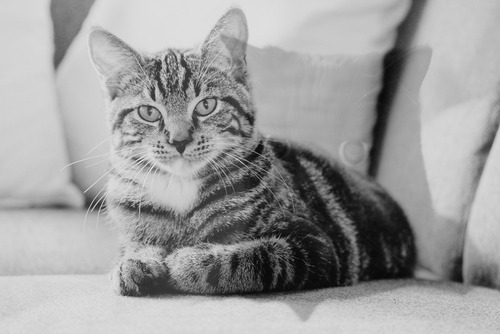

In [26]:
#generate second mixed signal
#factor used for the image
A = [0.8 , 0.2] 

Z = (S .* A')'

Z = Z[1,:,]+Z[2,:,]

imageZ = reshape(Z,rows,col)
save("mix_image_two.jpg",imageZ)
load("mix_image_two.jpg")


In [27]:


mixed_signal = hcat(X,Z)
    
#zca whitening 
#wX = fastICA.whiten(mixed_signal,false)

167000×2 Array{Float64,2}:
 0.956078  0.824314
 0.956863  0.827451
 0.956863  0.827451
 0.956863  0.827451
 0.957647  0.830588
 0.957647  0.830588
 0.958431  0.833725
 0.958431  0.833725
 0.957647  0.830588
 0.957647  0.830588
 0.957647  0.830588
 0.956863  0.827451
 0.956863  0.827451
 ⋮                 
 0.903529  0.743529
 0.905882  0.752941
 0.905098  0.749804
 0.902745  0.740392
 0.905882  0.752941
 0.894118  0.705882
 0.89098   0.693333
 0.905098  0.749804
 0.908235  0.762353
 0.907451  0.77098 
 0.906667  0.756078
 0.898824  0.736471

In [45]:
include("fastICA.jl")
W = fastICA.fast_ica(100,2,mixed_signal,0.000001,1.,true)

antes do loop wp = [0.122332, 0.877668]
antes do loop depois da cena wp = [0.138049, 0.990425]
wp = [0.138049, 0.990425]
w1 = [-0.138049, -0.990425]
W for iter 1 = [0.122332 0.877668; 0.241636 0.723689]
Change for iter 1 = 0.0
antes do loop wp = [0.0945313, -0.367985]
antes do loop depois da cena wp = [0.24881, -0.968552]
wp = [0.24881, -0.968552]
w1 = [-0.910312, 0.413923]
W for iter 1 = [0.122332 0.877668; 0.250315 0.749685]
Change for iter 1 = 0.3725988614694571


wp = [-0.910312, 0.413923]
w1 = [0.651986, -0.758231]
W for iter 2 = [0.122332 0.877668; 0.250315 0.749685]
Change for iter 2 = 0.09264007537057162
wp = [0.651986, -0.758231]
w1 = [-0.722634, 0.69123]
W for iter 3 = [0.122332 0.877668; 0.250315 0.749685]
Change for iter 3 = 0.00474013346942237
wp = [-0.722634, 0.69123]
w1 = [0.702889, -0.711299]
W for iter 4 = [0.122332 0.877668; 0.250315 0.749685]
Change for iter 4 = 0.0003963114053193717
wp = [0.702889, -0.711299]
w1 = [-0.708262, 0.705949]
W for iter 5 = [0.122332 0.877668; 0.250315 0.749685]
Change for iter 5 = 2.8744721972229215e-5
wp = [-0.708262, 0.705949]
w1 = [0.706791, -0.707422]
W for iter 6 = [0.122332 0.877668; 0.250315 0.749685]
Change for iter 6 = 2.1674665073856403e-6
wp = [0.706791, -0.707422]
w1 = [-0.707193, 0.70702]
W for iter 7 = [0.122332 0.877668; 0.250315 0.749685]
Change for iter 7 = 1.617068348114259e-7
K=[-0.00805903 -0.00558354; -0.0145454 0.0209942]


2×167000 Array{Float64,2}:
 0.000396694  0.00034605  0.00034605  …  0.000709921  0.000996122  0.001267 
 0.00253775   0.00259311  0.00259311     0.00175845   0.00148201   0.0011495

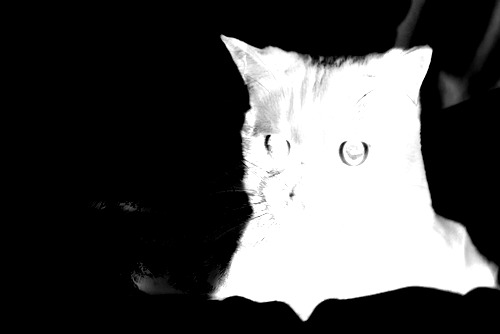

In [61]:
save("res_one.jpg",map(clamp01nan, reshape((W[1,:,])*256,rows,col)))
load("res_one.jpg")

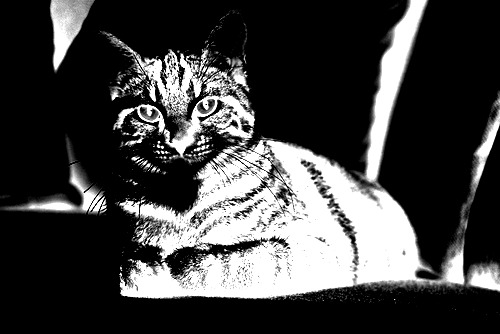

In [62]:
save("res_two.jpg",map(clamp01nan, reshape((W[2,:,])*256,rows,col)))
load("res_two.jpg")